In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 해결
import matplotlib.font_manager as fm  #매트플랏라이브러리 도움으로 폰트매니저 사용
import matplotlib

font_location = 'C:/Windows/Fonts/HMKMMAG.TTF'

font_name = fm.FontProperties(fname = font_location).get_name() 

matplotlib.rc('font', family=font_name)

In [3]:
path = "D:/Kamie/dataset/학습데이터처리_Data/남북한발전전력량.xlsx"
df = pd.read_excel(path, header=0)
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
# 북한의 전력 발전량만 가져옴
df = df.loc[5:9]
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [5]:
df.drop("전력량 (억㎾h)", axis=1, inplace=True)  # axis=column이라고 해도 됨
df

C:\Users\AI-00\AppData\Local\Temp/ipykernel_73832/3017494165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("전력량 (억㎾h)", axis=1, inplace=True)  # axis=column이라고 해도 됨


,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [6]:
df.set_index("발전 전력별", inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [7]:
df = df.T
df.head()

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


# ▶ 증감율 계산
전년 대비 증감율 컬럼을 만들고, 이 컬럼을 그래프로 그려주기

In [8]:
# 연도별 양을 찾기 위해선 빼야 하니까. 
df['총발전량-1'] = df['합계'].shift(1)  # shift(1) : 아래로 한 칸 이동
df.head()

발전 전력별,합계,수력,화력,원자력,총발전량-1
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221


### 전년 대비 증감률 = (현재년도-전년도)/전년도*100

In [9]:
df['증감율'] = ((df['합계'] / df['총발전량-1']) - 1) * 100
# df['증감율'] = ((df['합계'] - df['총발전량-1']) / df['총발전량-1']) * 100
df.head()

발전 전력별,합계,수력,화력,원자력,총발전량-1,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


## 막대 그래프 stack, 선 그래프를 겹쳐서 그리기 

Text(0.5, 1.0, '북한 전력 발전량 (1990 ~ 2016)')

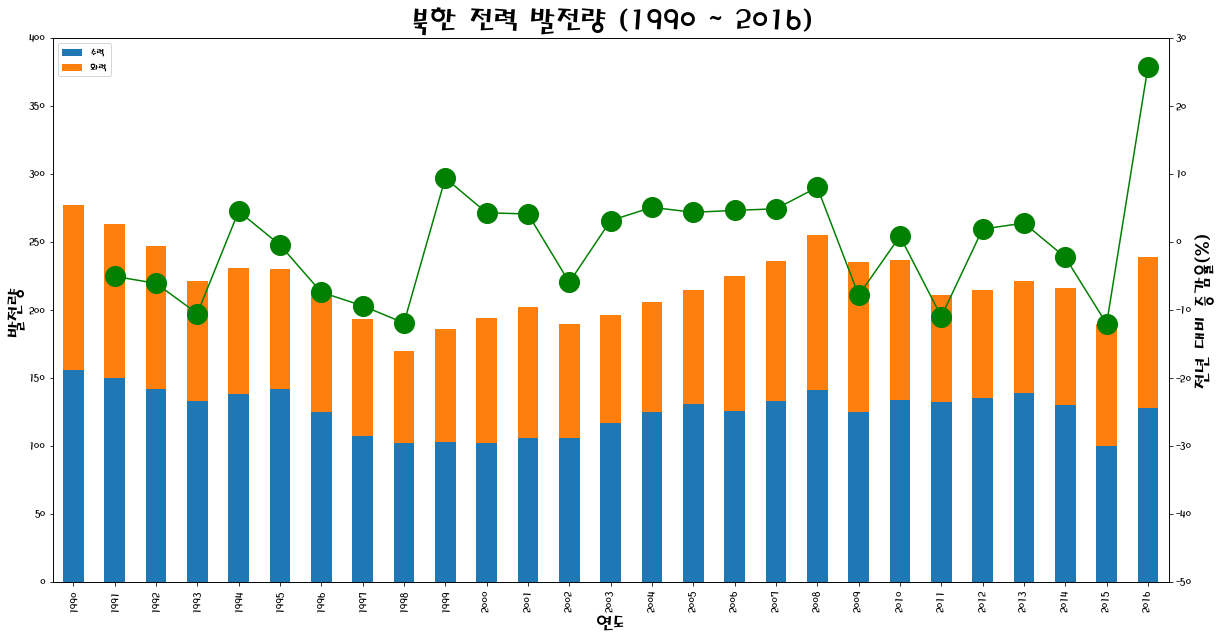

In [10]:
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20,10), stacked=True)
ax2 = ax1.twinx()  # ax2 : 선그래프
# twinx() : x-axis는 공유하고(연도), y-axis는 따로 표현하고자 할 때 

ax2.plot(df.index, df.증감율, 
         ls='-', marker='o', markersize=20, color='g')  # default는 선그래프  # ls=line style

ax1.set_xlabel("연도", fontsize=20)
ax1.set_ylabel("발전량", fontsize=20)
ax2.set_ylabel("전년 대비 증감율(%)", fontsize=20)

ax1.set_ylim(0, 400)
ax2.set_ylim(-50, 30)

ax1.legend(loc='upper left')

plt.rcParams['axes.unicode_minus'] = False  # 그래프에 - 깨지는 현상 해결
plt.title("북한 전력 발전량 (1990 ~ 2016)", size=30)

## +) 전력량 증감율 계산할 때 shift() 외 다른 방법으로 시도해보기

In [11]:
path = "D:/Kamie/dataset/학습데이터처리_Data/남북한발전전력량.xlsx"
df = pd.read_excel(path, header=0)

north = df.loc[5:9]  # 북한의 전력 발전량만 가져옴
north

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [12]:
north.drop("전력량 (억㎾h)", axis=1, inplace=True)
north.set_index("발전 전력별", inplace=True)

C:\Users\AI-00\AppData\Local\Temp/ipykernel_73832/2420397726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north.drop("전력량 (억㎾h)", axis=1, inplace=True)


In [13]:
north = north.T
north.head()

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [14]:
north.shape

(27, 4)

### ▷ shift(1) 대신 for문 사용

In [15]:
north['총발전량-1'] = None

for i in range(1, north.shape[0]):
    north['총발전량-1'][i] = north['합계'][i-1]

north.head()

발전 전력별,합계,수력,화력,원자력,총발전량-1
1990,277,156,121,-,None
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221


In [16]:
north['증감율'] = ((north['합계'] / north['총발전량-1']) - 1) * 100
# df['증감율'] = ((df['합계'] - df['총발전량-1']) / df['총발전량-1']) * 100
north.head()

발전 전력별,합계,수력,화력,원자력,총발전량-1,증감율
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


Text(0.5, 1.0, '북한 전력 발전량 (1990 ~ 2016)')

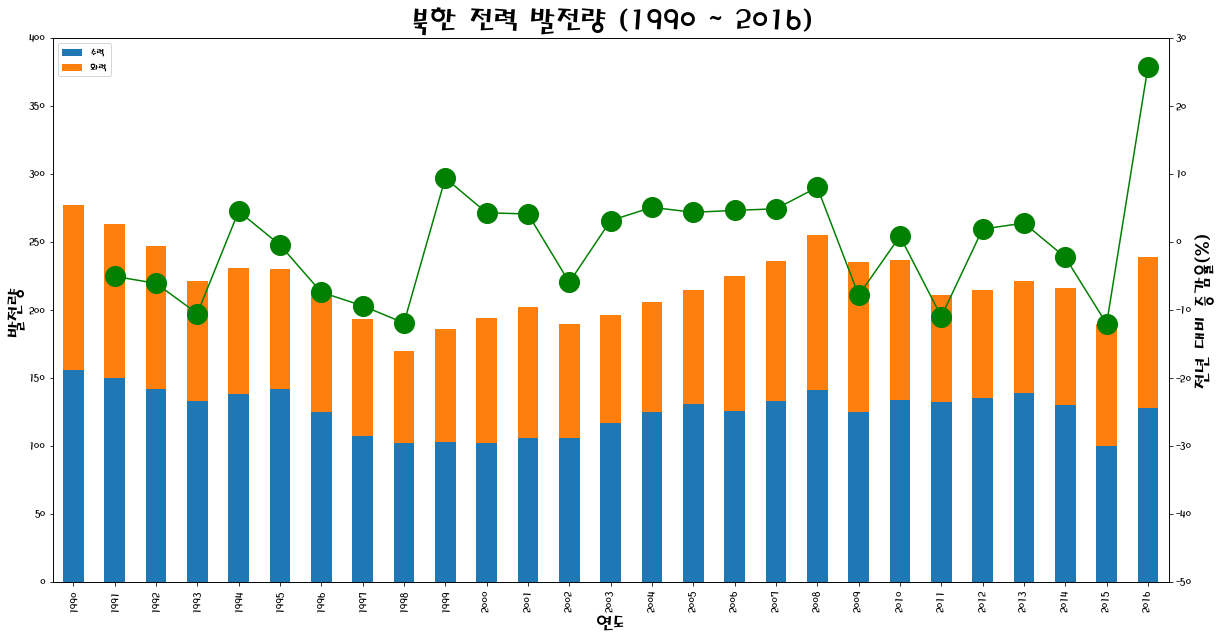

In [17]:
ax1 = north[['수력', '화력']].plot(kind='bar', figsize=(20,10), stacked=True)
ax2 = ax1.twinx()  # ax2 : 선그래프
# twinx() : x-axis는 공유하고(연도), y-axis는 따로 표현하고자 할 때 

ax2.plot(north.index, north.증감율, 
         ls='-', marker='o', markersize=20, color='g')  # default는 선그래프  # ls=line style

ax1.set_xlabel("연도", fontsize=20)
ax1.set_ylabel("발전량", fontsize=20)
ax2.set_ylabel("전년 대비 증감율(%)", fontsize=20)

ax1.set_ylim(0, 400)
ax2.set_ylim(-50, 30)

ax1.legend(loc='upper left')

plt.rcParams['axes.unicode_minus'] = False  # 그래프에 - 깨지는 현상 해결
plt.title("북한 전력 발전량 (1990 ~ 2016)", size=30)

---
# ▶ 자동차
1. ```groupby('origin').sum()``` 사용해보기
2. ```value_counts()``` 사용해보기

In [18]:
path2 = "D:/Kamie/dataset/학습데이터처리_Data/auto-mpg.csv"
df = pd.read_csv(path2, header=None)

# df = pd.read_csv(path, header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 
              'weight', 'acceleration', 'model year', 'origin', 'name']

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## ▷ 1. groupby를 사용하기 위해 count된 값을 넣기 위한 count 컬럼 생성

In [19]:
df['count'] = 1
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [20]:
# 제조국가 origin 열을 기준으로 그룹화 및 합계 연산
df_origin = df.groupby('origin').sum()
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [21]:
type(df_origin)

pandas.core.frame.DataFrame

In [22]:
# 제조국가 값 (1,2,3)을 usa, eu, japan으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


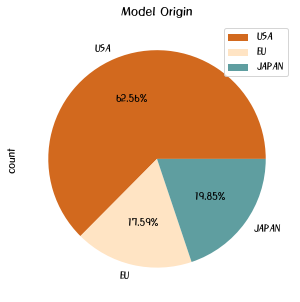

In [23]:
df_origin['count'].plot(kind='pie', 
                        figsize=(7,5), 
                        autopct='%.2f%%',  # %% 하면 %하나 출력됨
                        colors=['chocolate', 'bisque', 'cadetblue']
                       )

plt.title("Model Origin")
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

## ▷ 2. value_counts() 사용 

In [24]:
df_origin2 = df['origin'].value_counts()
df_origin2

1    249
3     79
2     70
Name: origin, dtype: int64

In [25]:
type(df_origin2)

pandas.core.series.Series

In [26]:
df_origin2.index = ['USA', 'EU', 'JAPAN']
df_origin2

USA      249
EU        79
JAPAN     70
Name: origin, dtype: int64

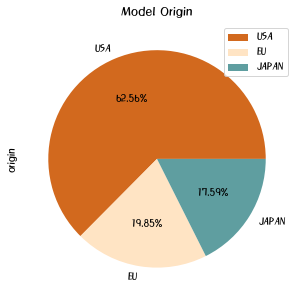

In [27]:
df_origin2.plot(kind='pie', 
                        figsize=(7,5), 
                        autopct='%.2f%%',  # %% 하면 %하나 출력됨
                        colors=['chocolate', 'bisque', 'cadetblue']
                       )

plt.title("Model Origin")
plt.legend(labels=df_origin2.index, loc='upper right')
plt.show()

---
# seaborn

In [28]:
df_scatter = df[['weight', 'mpg']]
df_scatter.head()

,weight,mpg
0,3504.0,18.0
1,3693.0,15.0
2,3436.0,18.0
3,3433.0,16.0
4,3449.0,17.0


<AxesSubplot:xlabel='weight', ylabel='mpg'>

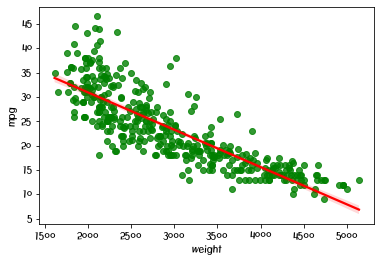

In [29]:
sns.regplot(x='weight', y='mpg', data=df_scatter, 
            scatter_kws={'color':'green'},
            line_kws={"color":"red"})

# 히트맵
- Dataset : seaborn에서 제공하는 flights라는 데이터셋 사용
- 연도, 월별 탑승자수를 한 눈에 보기 위해 히트맵으로 작성해보기

In [30]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [31]:
type(flight_data)

pandas.core.frame.DataFrame

In [32]:
df_flight = flight_data.pivot(index='month', 
                              columns='year', 
                              values='passengers')
df_flight

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


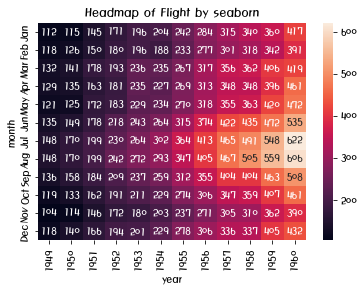

In [33]:
ax = sns.heatmap(df_flight, annot=True, fmt='d')
# sns.set(rc={"figure.figsize":(10, 10)})
plt.title("Headmap of Flight by seaborn")
plt.show()